In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import the dataset

In [2]:
review= pd.read_csv('employee_reviews.csv')

In [4]:
review.head(2)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...


In [5]:
review.describe()

,Unnamed: 0,overall-ratings,helpful-count
count,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,1.268211
std,19494.087501,1.154989,16.085852
min,1.000000,1.000000,0.000000
25%,16883.000000,3.000000,0.000000
50%,33765.000000,4.000000,0.000000
75%,50647.000000,5.000000,1.000000
max,67529.000000,5.000000,2094.000000


In [6]:
review.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

In [43]:
review['length']=review['cons'].apply(len)
#review['pros'].dtypes

# Visualization 

In [44]:
sns.set_style('white')

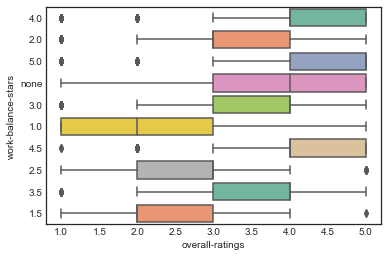

In [45]:
sns.boxplot(x='overall-ratings', y='work-balance-stars', data=review ,palette='Set2', saturation=0.75)

In [46]:
review.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link', 'asd', 'length'],
      dtype='object')

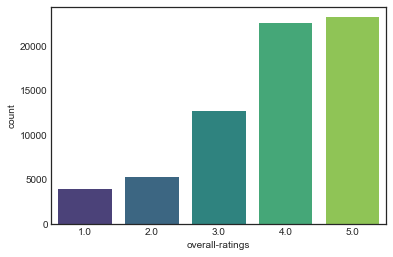

In [47]:
sns.countplot(x='overall-ratings',data=review,palette='viridis')

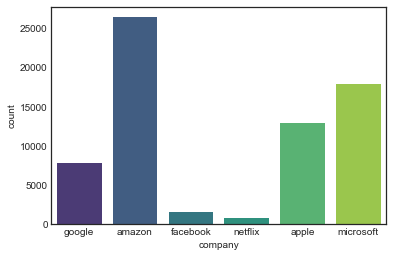

In [48]:
sns.countplot(x='company',data=review,palette='viridis')

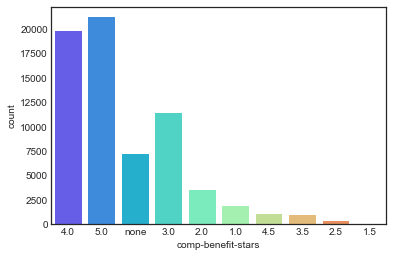

In [49]:
sns.countplot(x='comp-benefit-stars',data=review,palette='rainbow')

In [51]:
review['stars']=review['overall-ratings']
review.head(2)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,...,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,asd,length,starts,stars
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,...,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,34,34,5.0,5.0
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,...,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,2403,2403,4.0,4.0


# NLP Classification Task

In [52]:
review_class= review[(review.stars==1) | (review.stars==5)]

# Create two objects X and y. X will be the 'cons' column of review_class and y will be the 'stars' column of review_class.

In [56]:
X = review_class['cons'] ###tried with summary, didn't work
y = review_class['stars']

# Import CountVectorizer and create a CountVectorizer object.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [58]:
X = cv.fit_transform(X)

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [61]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [62]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [63]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 929  394]
 [ 401 7218]]


             precision    recall  f1-score   support

        1.0       0.70      0.70      0.70      1323
        5.0       0.95      0.95      0.95      7619

avg / total       0.91      0.91      0.91      8942

